# Homework #2 - Linear Regression
Cory Randolph

6/24/2022

CMPE 257

# Linear Regression

## 1 Explain how a linear regression algorithm trains in your own words

We use linear regression as a way to take some input variable and plug it into a linear equation ($y = mx + b$) to estimate the output variable. To train/fit a linear model we draw a line through all of the points and then find the error or distance between the points and plotted line. Then we can move/rotate this line until we get a line that has the lowest amount of total error and is the best fit.


## 2 Load the sklearn boston dataset

Import the needed packages

In [1]:
import pandas as pd
import numpy as np
import sklearn

Load the boston data set into a pandas DataFrame (Changed to California dataset since Boston has been deprecated)


In [2]:
"""Note you used to be able to import this directly but it has been deprecated"""
# # Import data from sklearn
# boston_data = sklearn.datasets.load_boston()

# # Convert data into a dataframe
# df = pd.DataFrame(
#     data = boston_data,
#     columns = boston_data.feature_names
# )

'Note you used to be able to import this directly but it has been deprecated'

In [3]:
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True)

# Show the various information included in the dataset
housing.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
df = pd.DataFrame(data = housing["data"], columns = housing["feature_names"])

# Add in the sales price/target column
df["SalePrice"] = housing["target"]

Display the first few wors of data to confirm it was loaded correctly

In [5]:
df.columns#.to_list()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Clean the data slightly for the simplicity of this exercise I will drop the categorical variables and only focus on the numerical ones. (We could use one-hot encoding or other options if needed)

In [6]:
df = df.select_dtypes([np.number])

Drop the Id column since it does not help with training

In [7]:
df.drop(['Id'], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Drop Data with missing values


In [8]:
print(f"Number of rows before dropping NA: \n{df.shape[0]}")

Number of rows before dropping NA: 
1460


In [9]:
df = df.dropna().reset_index()

In [10]:
print(f"Number of rows after dropping NA: \n{df.shape[0]}")

Number of rows after dropping NA: 
1121


## 3 Visualize the dataset using graphs

Fist display some overall data stats

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1121 entries, 0 to 1120
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1121 non-null   int64  
 1   MSSubClass     1121 non-null   float64
 2   LotFrontage    1121 non-null   float64
 3   LotArea        1121 non-null   float64
 4   OverallQual    1121 non-null   float64
 5   OverallCond    1121 non-null   float64
 6   YearBuilt      1121 non-null   float64
 7   YearRemodAdd   1121 non-null   float64
 8   MasVnrArea     1121 non-null   float64
 9   BsmtFinSF1     1121 non-null   float64
 10  BsmtFinSF2     1121 non-null   float64
 11  BsmtUnfSF      1121 non-null   float64
 12  TotalBsmtSF    1121 non-null   float64
 13  1stFlrSF       1121 non-null   float64
 14  2ndFlrSF       1121 non-null   float64
 15  LowQualFinSF   1121 non-null   float64
 16  GrLivArea      1121 non-null   float64
 17  BsmtFullBath   1121 non-null   float64
 18  BsmtHalf

In [12]:
df.describe()

,index,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,...,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000
mean,725.842105,56.146298,70.665477,10122.956289,6.212310,5.561106,1972.264942,1985.683318,108.487957,438.399643,...,92.610169,46.130241,21.844781,3.348796,16.100803,2.934880,23.429081,6.339875,2007.795718,185506.152542
std,420.769012,41.772684,24.266812,8129.302641,1.380822,1.068236,30.967730,21.025974,189.500966,468.385038,...,121.868623,64.390029,61.282083,29.772540,57.801829,40.222087,165.759816,2.687854,1.335043,82999.159004
min,0.000000,20.000000,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,363.000000,20.000000,60.000000,7590.000000,5.000000,5.000000,1953.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,131000.000000
50%,724.000000,50.000000,70.000000,9416.000000,6.000000,5.000000,1974.000000,1995.000000,0.000000,374.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,164900.000000
75%,1090.000000,70.000000,80.000000,11361.000000,7.000000,6.000000,2003.000000,2005.000000,170.000000,702.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,219500.000000
max,1459.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,648.000000,2500.000000,12.000000,2010.000000,755000.000000


Visualize various aspects of the graph

In [13]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

Show histograms for all quantitative variables

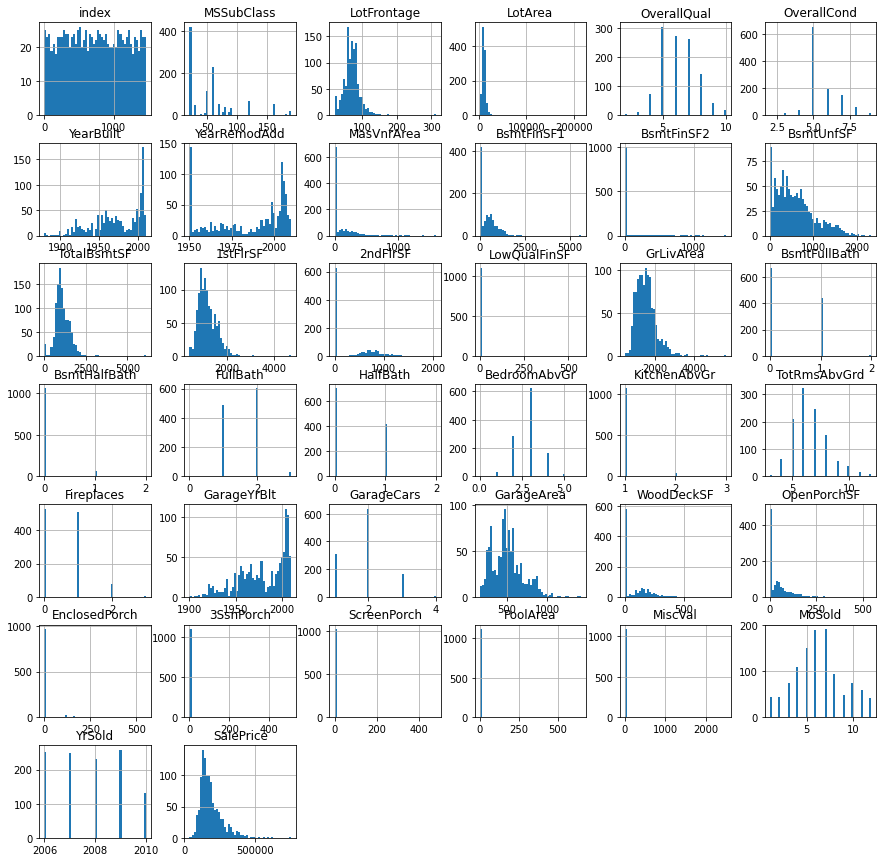

In [14]:
df.hist(bins=50, figsize=(15, 15));

Create a seaborn plot to better show the Sale Price (Target Variable)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


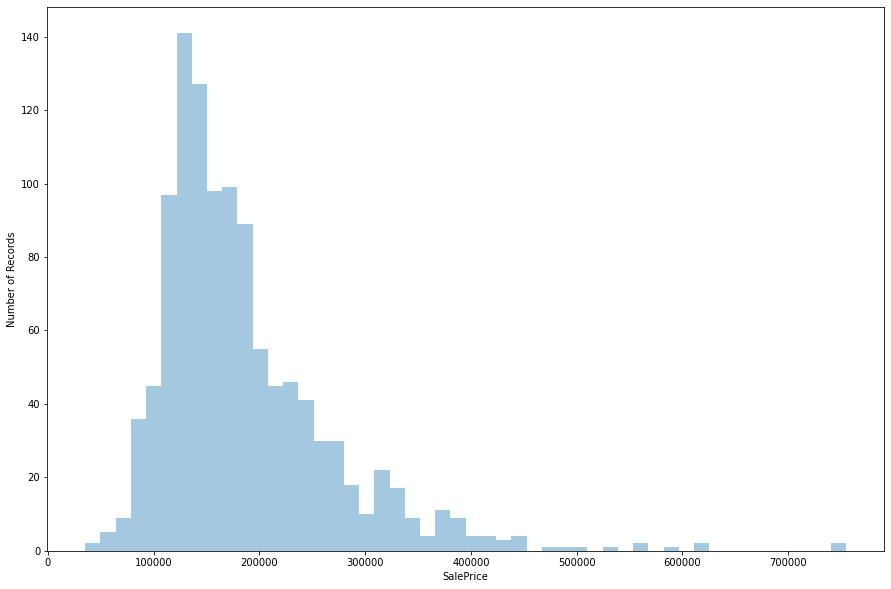

In [15]:
plt.figure(figsize = (15,10))
plt.xlabel('House Sale Price')
plt.ylabel('Number of Records')
sns.distplot(df['SalePrice'], bins=50,kde=False)
plt.show()

Create a few scatter plots for variables vs Sale Price to see if there are any obvious correlations.

<Figure size 1080x720 with 0 Axes>

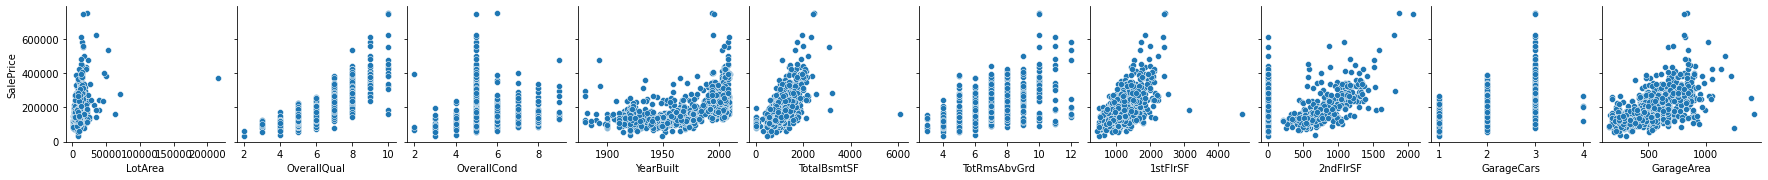

In [16]:
plt.figure(figsize = (15,10))
sns.pairplot(data = df, x_vars=['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'TotalBsmtSF', 'TotRmsAbvGrd', '1stFlrSF', '2ndFlrSF', 'GarageCars', 'GarageArea'],y_vars ='SalePrice') #,hue = 'SaleType');

The above graph shows that many of these features have a seemingly positive correlation with the Sales Price which means they should have some strong predictive power when creating a linear model.

Digging into the Overall Quality factor should be interesting since it has one of the clearest correlations.

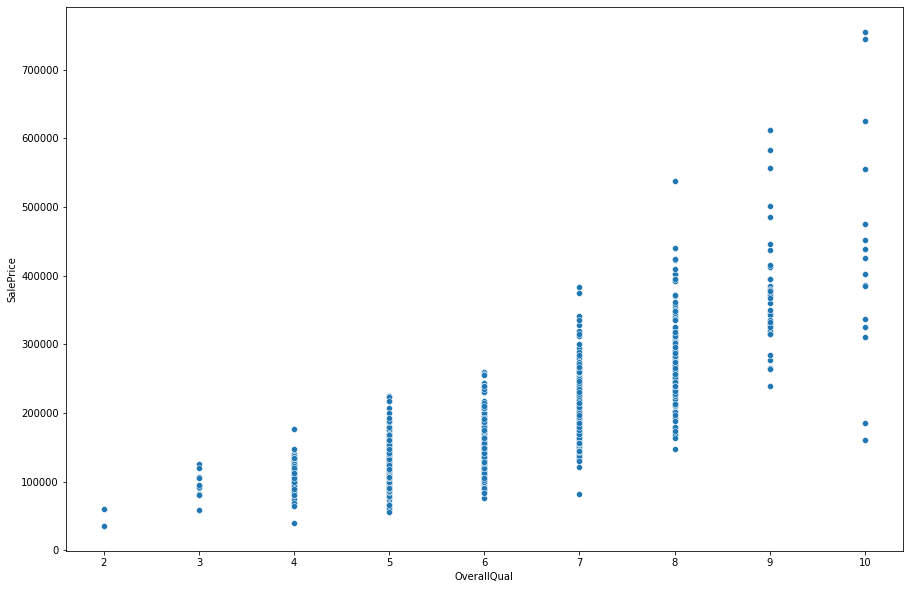

In [17]:
plt.figure(figsize = (15,10))
sns.scatterplot(data=df, x="OverallQual", y="SalePrice")#, hue="SaleType");

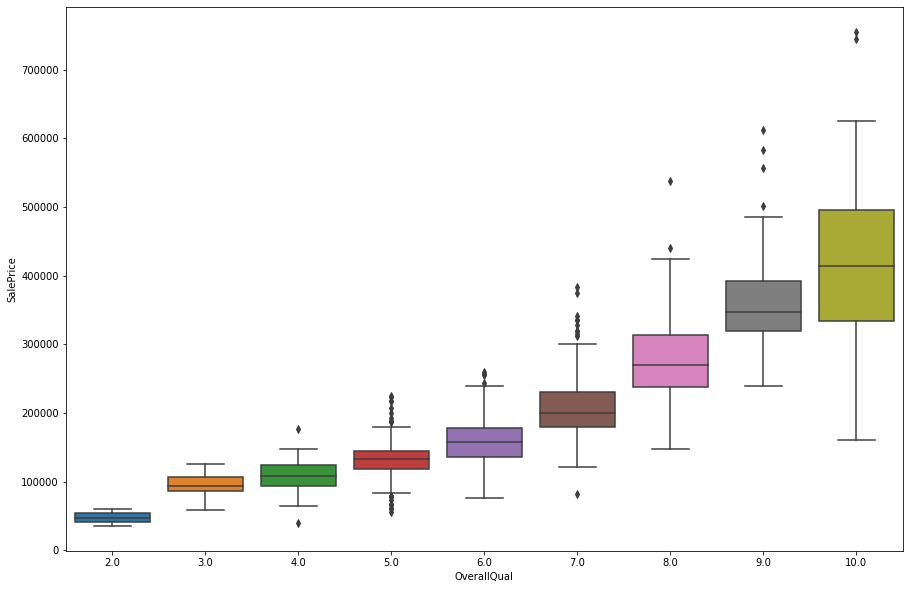

In [18]:
plt.figure(figsize = (15,10))
sns.boxplot(data = df, x = 'OverallQual', y = 'SalePrice');

## 4 Calculate the pearson correlation matrix of the data

Use the built in pandas correlation calculation for a dataframe and then plot it with seaborn.

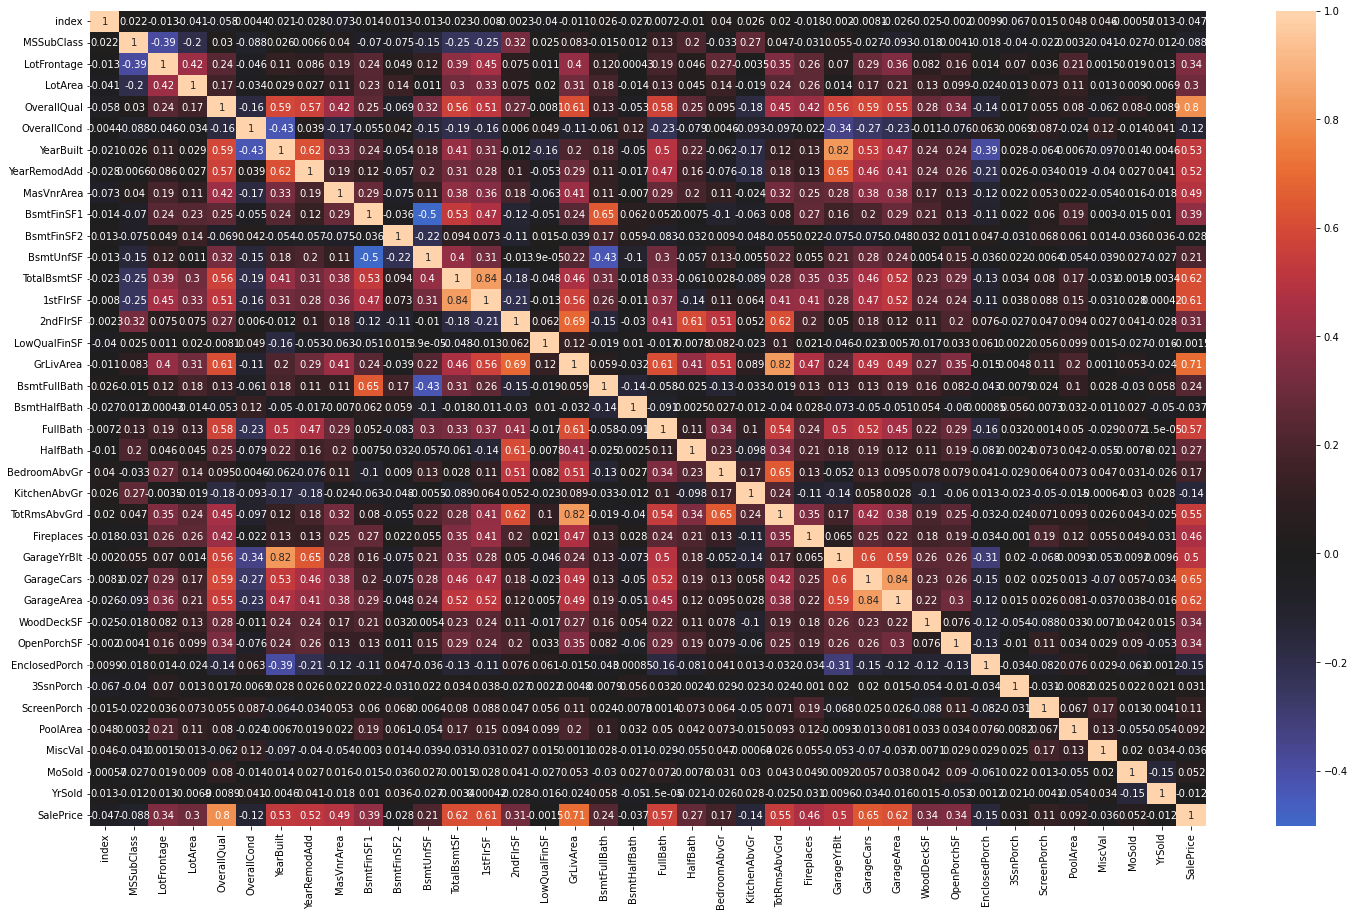

In [19]:
plt.figure(figsize = (25,15))
sns.heatmap(df.corr(),annot=True,center=0 );

## 5 Select features which are more related to the target variable using graphs and the correlation matrix, are the both indicating the same features? (MEDV is the target variable)

Based on the graphs and the correlation matrix/plot, some promising features are:

* LotArea
* OverallQual
* OverallCond
* YearBuilt
* TotalBsmtSF
* TotRmsAbvGrd
* 1stFlrSF
* 2ndFlrSF
* GarageCars
* GarageArea
* GrLivArea



## 6 Compare correlation of feature between themselves and if two features are highly correlated remove one of them (the one with lesser correlation with the target variable) 

To narrow this down a little more lets re-calculate the correlation with only the selected features.

In [20]:
df.columns


Index(['index', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [21]:
df_reduced = df.copy()

df_reduced = df_reduced[['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 
                         'YearRemodAdd', 'TotalBsmtSF', 'TotRmsAbvGrd', 'GrLivArea',
                         '1stFlrSF', '2ndFlrSF', 'GarageCars', 'GarageArea', 
                         'SalePrice']]
df_reduced.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,TotRmsAbvGrd,GrLivArea,1stFlrSF,2ndFlrSF,GarageCars,GarageArea,SalePrice
0,8450.0,7.0,5.0,2003.0,2003.0,856.0,8.0,1710.0,856.0,854.0,2.0,548.0,208500.0
1,9600.0,6.0,8.0,1976.0,1976.0,1262.0,6.0,1262.0,1262.0,0.0,2.0,460.0,181500.0
2,11250.0,7.0,5.0,2001.0,2002.0,920.0,6.0,1786.0,920.0,866.0,2.0,608.0,223500.0
3,9550.0,7.0,5.0,1915.0,1970.0,756.0,7.0,1717.0,961.0,756.0,3.0,642.0,140000.0
4,14260.0,8.0,5.0,2000.0,2000.0,1145.0,9.0,2198.0,1145.0,1053.0,3.0,836.0,250000.0


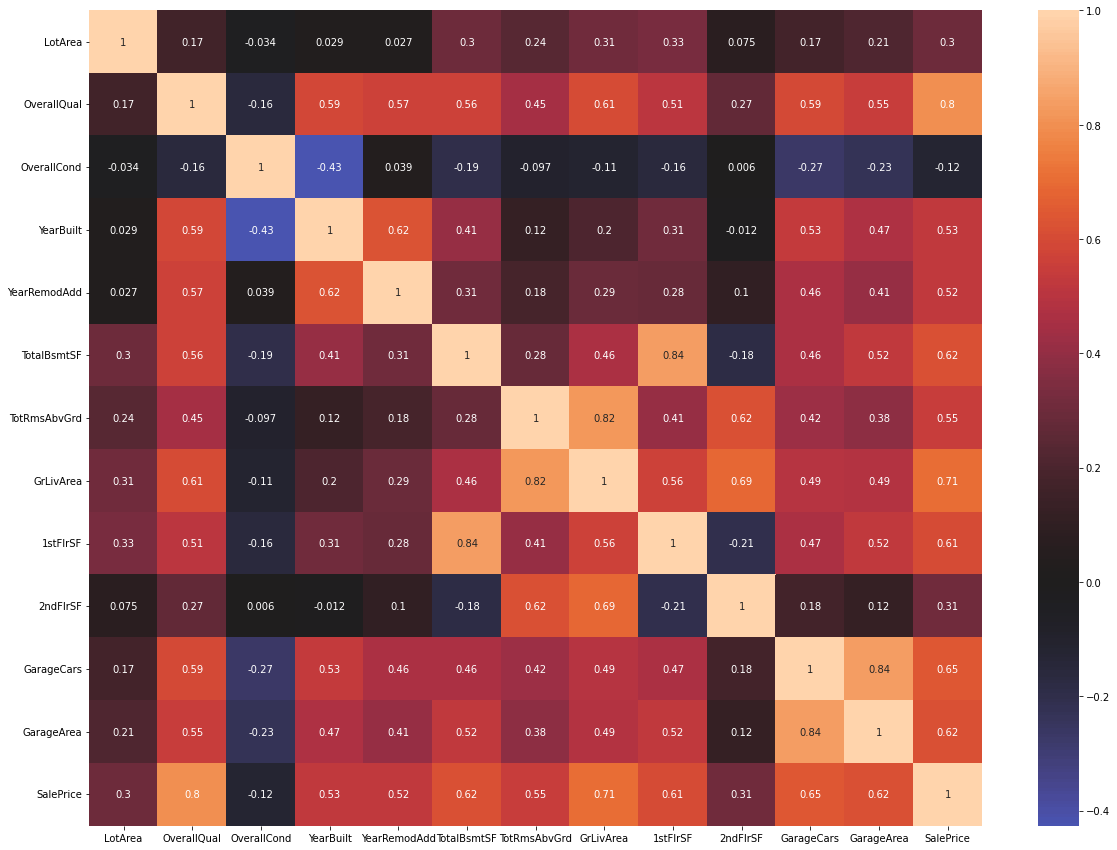

In [22]:
plt.figure(figsize = (20,15))
sns.heatmap(df_reduced.corr(),annot=True,center=0 );

Based on the correlation matrix above there are several features that seem highly correlated and should be removed.

* YearBuild vs YearRemodAdd
* TotRmsAbvGrd vs GrLivArea
* GarageCars vs GarageArea

In [23]:
df_reduced_corr_features = df_reduced.copy()

df_reduced_corr_features.drop(columns = ["YearRemodAdd", "TotRmsAbvGrd", "GarageCars"],
                              axis = 1, inplace = True)

df_reduced_corr_features.head()

,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,GrLivArea,1stFlrSF,2ndFlrSF,GarageArea,SalePrice
0,8450.0,7.0,5.0,2003.0,856.0,1710.0,856.0,854.0,548.0,208500.0
1,9600.0,6.0,8.0,1976.0,1262.0,1262.0,1262.0,0.0,460.0,181500.0
2,11250.0,7.0,5.0,2001.0,920.0,1786.0,920.0,866.0,608.0,223500.0
3,9550.0,7.0,5.0,1915.0,756.0,1717.0,961.0,756.0,642.0,140000.0
4,14260.0,8.0,5.0,2000.0,1145.0,2198.0,1145.0,1053.0,836.0,250000.0


## 7 perform the following steps 3 times, 1 with the entire dataset, 1 with the selected features from step 5 and 1 with the selected features from step 6 

## NOTE: FEATURE SELECTION IS USUALLY REQUIRED ONLY WHEN THERE ARE 100s TO 1000s OF FEATURES OR MORE, BUT HERE FOR EDUCATIONAL PURPOSES WE ARE PRACTICING FEATURE SELECTION ON A SMALLER DATASET

## 8 Split into train and test

In [24]:
from sklearn.model_selection import train_test_split

### 8.1 Full Data


Split the data into 80% train and 20 % test


In [25]:
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(pd.DataFrame(df.drop(['SalePrice'], axis = 1)), 
                                                    df["SalePrice"],
                                                    test_size = 0.20,
                                                    random_state = 3)


### 8.2 Reduced Data


Split the data into 80% train and 20 % test


In [26]:
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(pd.DataFrame(df_reduced.drop(['SalePrice'], axis = 1)), 
                                                    df_reduced["SalePrice"],
                                                    test_size = 0.20,
                                                    random_state = 3)


### 8.3 Reduced Correlated Features Data


Split the data into 80% train and 20 % test


In [27]:
X_train_reduced_corr_features, X_test_reduced_corr_features, y_train_reduced_corr_features, y_test_reduced_corr_features = train_test_split(pd.DataFrame(df_reduced_corr_features.drop(['SalePrice'], axis = 1)), 
                                                    df_reduced_corr_features["SalePrice"],
                                                    test_size = 0.20,
                                                    random_state = 3)


## 9 Normalize the data

In [28]:
from sklearn.preprocessing import StandardScaler

### 9.1 Full Data

Normalize the input data by applying a min-max scaler

In [29]:
scaler_full =  StandardScaler()

# Apply scaling to the training data
scaler_full.fit(X_train_full)
X_train_scaled_full = scaler_full.transform(X_train_full)

# Apply the same scaling to X test
X_test_scaled_full = scaler_full.transform(X_test_full)

### 9.2 Reduced Data

Normalize the input data by applying a min-max scaler

In [30]:
scaler_reduced =  StandardScaler()

# Apply scaling to the training data
scaler_reduced.fit(X_train_reduced)
X_train_scaled_reduced = scaler_reduced.transform(X_train_reduced)

# Apply the same scaling to X test
X_test_scaled_reduced = scaler_reduced.transform(X_test_reduced)

### 9.3 Reduced Correlated Features Data

Normalize the input data by applying a min-max scaler

In [31]:
scaler_reduced_corr_features =  StandardScaler()

# Apply scaling to the training data
scaler_reduced_corr_features.fit(X_train_reduced_corr_features)
X_train_scaled_reduced_corr_features = scaler_reduced_corr_features.transform(X_train_reduced_corr_features)

# Apply the same scaling to X test
X_test_scaled_reduced_corr_features = scaler_reduced_corr_features.transform(X_test_reduced_corr_features)

## 10 Train the model and perform hyper parameter tuning using cross validation

In [32]:
from sklearn.linear_model import LinearRegression

### 10.1 Full Data

Create an instance of the linear model from sklearn

In [33]:
model_full = LinearRegression()

Fit the model with the scaled data

In [34]:
y_train_pred_full = model_full.fit(X_train_scaled_full, y_train_full)

Show a prediction to demonstrate that the model is actually working

In [35]:
pred_full = model_full.predict(X_train_scaled_full)[0]
print(f"Predicted Value: \n{pred_full:,.0f}")

print(f"Actual Value: \n{y_train_full[0]:,.0f}")

Predicted Value: 
165,448
Actual Value: 
208,500


Apply cross validation to the model

In [36]:
from sklearn.model_selection import cross_val_score
scores_full = cross_val_score(model_full, X_train_scaled_full, y_train_full, cv=5)
scores_full

array([0.84895343, 0.88294576, 0.85927951, 0.83567322, 0.60641892])

### 10.2 Reduced Data

Create an instance of the linear model from sklearn

In [37]:
model_reduced = LinearRegression()

Fit the model with the scaled data

In [38]:
y_train_pred_reduced = model_reduced.fit(X_train_scaled_reduced, y_train_reduced)

Show a prediction to demonstrate that the model is actually working

In [39]:
pred_reduced = model_reduced.predict(X_train_scaled_reduced)[0]
print(f"Predicted Value: \n{pred_reduced:,.0f}")

print(f"Actual Value: \n{y_train_reduced[0]:,.0f}")

Predicted Value: 
165,604
Actual Value: 
208,500


Apply cross validation to the model

In [40]:
from sklearn.model_selection import cross_val_score
scores_reduced = cross_val_score(model_reduced, X_train_scaled_reduced, y_train_reduced, cv=5)
scores_reduced

array([0.82440956, 0.84356472, 0.76095197, 0.83539519, 0.60980722])

### 10.3 Reduced Correlated Features Data

Create an instance of the linear model from sklearn

In [41]:
model_reduced_corr_features = LinearRegression()

Fit the model with the scaled data

In [42]:
y_train_pred_reduced_corr_features = model_reduced_corr_features.fit(X_train_scaled_reduced_corr_features, y_train_reduced_corr_features)

Show a prediction to demonstrate that the model is actually working

In [43]:
pred_reduced_corr_features = model_reduced_corr_features.predict(X_train_scaled_reduced_corr_features)[0]
print(f"Predicted Value: \n{pred_reduced_corr_features:,.0f}")

print(f"Actual Value: \n{y_train_reduced_corr_features[0]:,.0f}")

Predicted Value: 
166,563
Actual Value: 
208,500


Apply cross validation to the model

In [44]:
from sklearn.model_selection import cross_val_score
scores_reduced_corr_features = cross_val_score(model_reduced_corr_features, X_train_scaled_reduced_corr_features, y_train_reduced_corr_features, cv=5)
scores_reduced_corr_features

array([0.82875016, 0.84452802, 0.76411233, 0.83608784, 0.61376609])

With a linear model there is not really much hyper parameter tuning to be done. So we will consider the different selections of features as the tuning of the model.

## 11 Test the model on test set

In [45]:
import sklearn.metrics as metrics

Create a function that will run the various metrics for a given model and we will apply it to all three of the different datasets (Full, Reduces, and Reduced Correlated Features)

In [46]:
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

### 11.1 Full Data

Calculate the prediction for the model and then apply the metrics function created above.

In [47]:
y_preds_full = model_full.predict(X_test_scaled_full)

In [48]:
regression_results(y_true = y_test_full, y_pred = y_preds_full)

explained_variance:  0.5105
mean_squared_log_error:  0.0356
r2:  0.5036
MAE:  24205.1736
MSE:  3023989206.6184
RMSE:  54990.8102


### 11.2 Reduced Data

Calculate the prediction for the model and then apply the metrics function created above.

In [49]:
y_preds_reduced = model_reduced.predict(X_test_scaled_reduced)

In [50]:
regression_results(y_true = y_test_reduced, y_pred = y_preds_reduced)

explained_variance:  0.5407
mean_squared_log_error:  0.036
r2:  0.5332
MAE:  24818.6736
MSE:  2843276239.1504
RMSE:  53322.3803


### 11.2 Reduced Correlated Features Data

Calculate the prediction for the model and then apply the metrics function created above.

In [51]:
y_preds_reduced_corr_features = model_reduced_corr_features.predict(X_test_scaled_reduced_corr_features)

In [52]:
regression_results(y_true = y_test_reduced_corr_features, y_pred = y_preds_reduced_corr_features)

explained_variance:  0.5316
mean_squared_log_error:  0.0359
r2:  0.5237
MAE:  24844.5301
MSE:  2901495187.7211
RMSE:  53865.5288


## Summary Notes

When comparing the three versions of the models the reduced data actually had the highest explained variance, but the full data had the lowest Mean Absolute error of $24,844 away from the target sale price.

# Reference

mpgmpg                    3, et al. “How to Get a Regression Summary in Scikit-Learn like R Does?” Stack Overflow, 1 May 1962, https://stackoverflow.com/questions/26319259/how-to-get-a-regression-summary-in-scikit-learn-like-r-does. 